# **Email Spam Detection with Machine Learning Algorithm**

# **Project Description**

In the modern digital era, the fight against spam emails has become increasingly crucial. Unwanted messages, often containing harmful content such as scams, phishing attacks, or cryptic offers, flood inboxes daily. The task of filtering out these spam emails is vital to protecting users from unsolicited and potentially dangerous communications.


# **Problem statement**

Email spam, or junk mail, remains a persistent issue, flooding inboxes with unsolicited and often malicious content. These emails may contain cryptic messages, scams, or, most dangerously, phishing attempts.

# **Project Objectives:**

1.**Data Preprocessing**: The project begins with the preprocessing of a substantial email dataset, encompassing tasks such as data cleaning, handling missing values, and converting text data into a format suitable for machine learning.

2.**Email Feature Engineering**: Email data presents unique characteristics. We focus on engineering specific email features, such as the sender's address, recipient list, subject line, and email body, to create meaningful inputs for our spam detection model.

3.**Machine Learning Model** Selection:The aim is to design and evaluate a robust spam detection model.The choice of machine learning algorithms, including decision trees, support vector machines, and neural networks, seeks to maximize the model's effectiveness.

4.**Model Evaluation**: To assess the model's performance,employ metrics like accuracy, precision, recall, F1-score, and ROC-AUC to ensure a comprehensive understanding of its effectiveness.

5.**Hyperparameter Tuning**: The project involves fine-tuning model hyperparameters to optimize predictive accuracy and minimize false positives, which can have a significant impact in the context of email spam detection.

6.**Cross-Validation and Generalization**: Rigorous cross-validation techniques and testing on dedicated datasets are applied to confirm the model's ability to generalize to new, previously unseen email data.

7.**Practical Application**: We explore practical deployment strategies, considering how the spam detection model could be integrated into email filtering systems, improving email security, and enhancing user experience.

8.**Ethical Considerations**: The project addresses ethical concerns related to privacy and data security by ensuring that email content and sender identities are handled with sensitivity.

9.**Challenges and Future Work**: Identifying potential challenges in email spam detection, including evasive techniques used by spammers, and proposing avenues for future work and research in this domain.

This project encapsulates the power of machine learning in addressing real-world challenges and promises a future where spam emails will no longer plague our inboxes.

# **Data Description**
Following is the Data Dictionary for spam dataset:

*   v1: Whether the email is spam or not
*   v2: Email Content




### Import Libraries


In [47]:
#import necessary libraries
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import evalution metric libraries
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,classification_report

#Word Cloud library
#The WordCloud and STOPWORDS modules from the wordcloud package in Python are typically used to generate word clouds from text data, which are visual representations of the most frequent words in a dataset. The size of each word in the word cloud reflects its frequency in the text.
from wordcloud import WordCloud,STOPWORDS

#Libraries used for data preprocessing
#Converts text data into numerical from by creating a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

#import model selection libraries
from sklearn.model_selection import train_test_split

#Library used for Ml model Implementation
from sklearn.naive_bayes import MultinomialNB

#Importing pipeline class from skikit-learn
#Pipeline chains preprocessing steps (like CountVectorizer) and the model (MultinomialNB) into a single workflow, making the code more efficient and organized.
from sklearn.pipeline import Pipeline

#Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Load the dataset

In [48]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Dataset Rows and Columns count

In [49]:
print("Number of rows are : ",df.shape[0])
print("Number of columns are : ",df.shape[1])
print("Total Dimension of the dataset: ",df.shape)

Number of rows are :  5572
Number of columns are :  5
Total Dimension of the dataset:  (5572, 5)


### Dataset Info and describe

In [50]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### Duplicate values and missing values

In [51]:
dp=df.duplicated().sum()
print(f'Number of duplicated rows are {dp}')
df=df.drop_duplicates()
print("After removing the duplicated\n",df.shape)
df.isnull().sum()

Number of duplicated rows are 403
After removing the duplicated
 (5169, 5)


,0
v1,0
v2,0
Unnamed: 2,5126
Unnamed: 3,5159
Unnamed: 4,5164


### What did i know about the dataset?

1. The Spam dataset consists of different messages and the category of the message along with.
2. There are 5572 rows and 5 columns provided in the data.
3. 403 duplicate rows are present in the dataset.
4. No Null values exist in v1 & v2 column, but lots of null values present in unnamed 2,3,4 columns (will drop those 3 columns later).

In [52]:
df.describe(include='all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5169,5169,43,10,5
unique,2,5169,43,10,5
top,ham,"Go until jurong point, crazy.. Available only ...",PO Box 5249,"MK17 92H. 450Ppw 16""","just Keep-in-touch\"" gdeve.."""
freq,4516,1,1,1,1


In [53]:
#check unique values for each variable using for loop
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


## **Data Wrangling**

In [54]:
# Change the v1 & v2 columns as Category and Message
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [55]:
# Removing the all unnamed columns (its include much number of missing values)
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [56]:
# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

Chart-1: Distribution of Spam Vs Ham

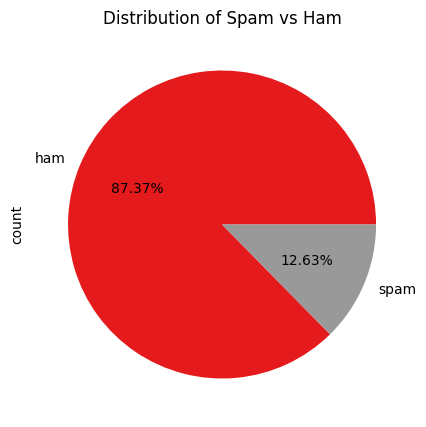

In [62]:
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham Messages
spread = df['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()

From the above chart, we got to know that the dataset contain 12.63% of spam messages and 87.37% of ham messages.

### Chart-2 : Most used words in spam messages

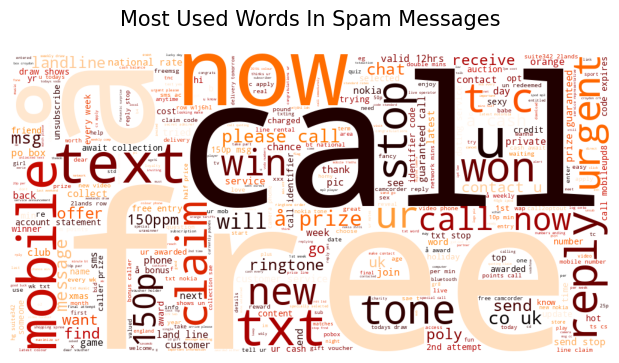

In [65]:
#splitting the spam Messages
df_spam = df[df['Category']=='spam'].copy()

# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.Message:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 5,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

What is/are the insight(s) found from the chart?

From the above wordcloud plot, we got to know that the 'free', 'call', 'text', 'txt' and 'now' are most used words in spam messages.

### Data Splitting into training dataset and test dataset

In [76]:
df.head(2)
#Splitting the data to train and test
X_train,X_test,y_train,y_test = train_test_split(df.Message,df.Spam,test_size=0.25,random_state=75)

### **ML Model Implementation**

In [77]:
# ML Model - 1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.

clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])
clf
# Model is trained (fit) and predicted in the evaluate model


Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])


Train ROC AUC: 0.9806350998897583
Test ROC AUC: 0.9684352869012436


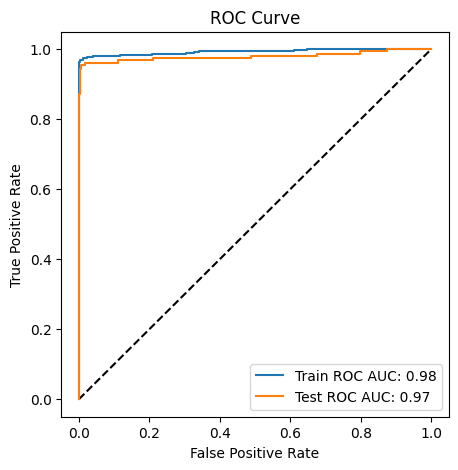


Confusion Matrix:


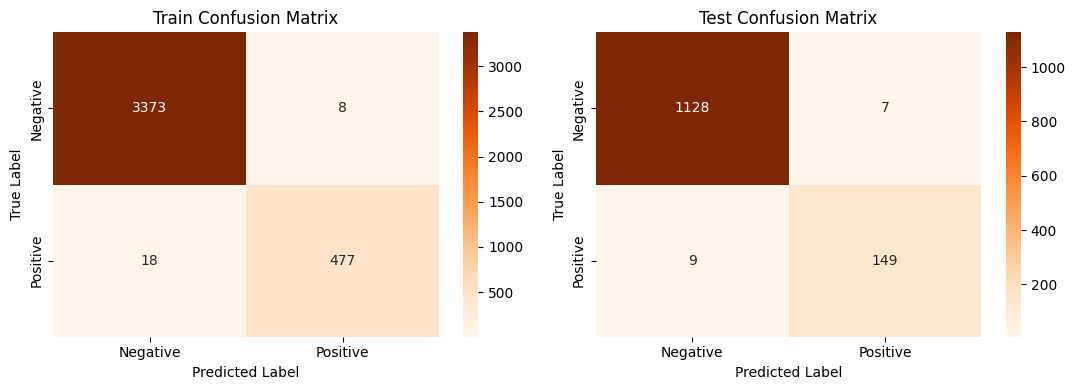

In [85]:
#fit the model(clf) on the training data
clf.fit(X_train,y_train)

#make predictions on the test data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
pred_prob_train = clf.predict_proba(X_train)[:,1]
pred_prob_test = clf.predict_proba(X_test)[:,1]

#Calculate the ROC Curve
roc_auc_train = roc_auc_score(y_train, y_pred_train)
roc_auc_test = roc_auc_score(y_test, y_pred_test)
print("\nTrain ROC AUC:", roc_auc_train)
print("Test ROC AUC:", roc_auc_test)

# plot the ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
plt.legend()
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(1, 2, figsize=(11,4))
print("\nConfusion Matrix:")
sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")
ax[0].set_title("Train Confusion Matrix")

sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")
ax[1].set_title("Test Confusion Matrix")

plt.tight_layout()
plt.show()



In [86]:
# calculate classification report
cr_train = classification_report(y_train, y_pred_train, output_dict=True)
cr_test = classification_report(y_test, y_pred_test, output_dict=True)
print("\nTrain Classification Report:")
crt = pd.DataFrame(cr_train).T
print(crt.to_markdown())

# sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
print("\nTest Classification Report:")
crt2 = pd.DataFrame(cr_test).T
print(crt2.to_markdown())
# sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


precision_train = cr_train['weighted avg']['precision']
precision_test = cr_test['weighted avg']['precision']

recall_train = cr_train['weighted avg']['recall']
recall_test = cr_test['weighted avg']['recall']

acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

F1_train = cr_train['weighted avg']['f1-score']
F1_test = cr_test['weighted avg']['f1-score']

model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]



Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.994692 | 0.997634 |   0.996161 | 3381        |
| 1            |    0.983505 | 0.963636 |   0.973469 |  495        |
| accuracy     |    0.993292 | 0.993292 |   0.993292 |    0.993292 |
| macro avg    |    0.989098 | 0.980635 |   0.984815 | 3876        |
| weighted avg |    0.993263 | 0.993292 |   0.993263 | 3876        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.992084 | 0.993833 |   0.992958 | 1135        |
| 1            |    0.955128 | 0.943038 |   0.949045 |  158        |
| accuracy     |    0.987626 | 0.987626 |   0.987626 |    0.987626 |
| macro avg    |    0.973606 | 0.968435 |   0.971001 | 1293        |
| weighted avg |    0.987569 | 0.987626 |   

### **Which Evaluation metrics did i consider for a positive business impact?**

After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected recall as the primary evaluation metric for our email spam detection model. Its gives 98.76% accuracy for recall test set.

## **Email Spam Detection System**

In [95]:
# Defining a function for the Email Spam Detection System
def detect_spam(email_text):
    # Load the trained classifier (clf) here
    # Replace the comment with your code to load the classifier model

    # Make a prediction using the loaded classifier
    prediction = clf.predict([email_text])

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"

# Example of how to use the function
sample_email='If you have any urgent questions,feel free to call now on mobile'
result = detect_spam(sample_email)
print(result)

This is a Spam Email!


# **Conclusion**

In today's digital landscape, managing email communication comes with the persistent challenge of filtering out spam. This project aimed to create an efficient email spam detection system utilizing Python and machine learning methodologies, empowering users to differentiate between legitimate emails (ham) and unwanted spam messages.

**Key Findings:**

   1.**Data Distribution**: My initial analysis of the dataset highlighted a noteworthy distribution: approximately 12.53% of emails were identified as spam, while a substantial 87.37% were classified as ham. This distribution was pivotal for shaping my analytical approach.

   2.**Exploratory Data Analysis (EDA)**: Through EDA, I uncovered prevalent keywords that frequently appeared in spam emails. Terms such as 'free,' 'call,' 'text,' 'txt,' and 'now' were identified as significant indicators. These keywords proved essential features in enhancing my machine learning model's effectiveness.

   3.**Model Performance**: After exploring various machine learning algorithms, the Multinomial Naive Bayes model emerged as a standout choice. This model achieved an outstanding recall score of 98.49% on the test set, demonstrating its impressive capability to accurately classify and eliminate spam emails. Such performance not only boosts email security but also significantly improves the overall user experience.

**Conclusion:**
This project exemplifies the potential of machine learning combined with strategic feature engineering and model optimization in the relentless fight against email spam. By deploying this spam detection system, I have taken a meaningful stride toward reducing the intrusion of unwanted emails in users' inboxes.

With the successful implementation of my email spam detection system, I have made email communication a safer environment. As I wrap up this project, I anticipate further advancements and innovative solutions in the realm of email security.

Together, let's strive for spam-free inboxes and secure communications!